#### **0. Temporal Search**

In [1]:
%cd D:/AIC2024

D:\AIC2024


In [2]:
from utils.embedding_based_search.embedding_based_search import EmbeddingBasedSearch
from utils.temporal_search.temporal_search import TemporalSearch
from utils.query_processing.translator import Translator
from utils.system_call.utils import display_images
from langdetect import detect
import time

c:\Users\LONG\anaconda3\envs\aic2024-env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\LONG\anaconda3\envs\aic2024-env\lib\site-packages\fairscale\experimental\nn\offload.py:19: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  return torch.cuda.amp.custom_fwd(orig_func)  # type: ignore
c:\Users\LONG\anaconda3\envs\aic2024-env\lib\site-packages\fairscale\experimental\nn\offload.py:30: FutureWarning: `torch.cuda.amp.custom_bwd(args...)` is deprecated. Please use `torch.amp.custom_bwd(args..., device_type='cuda')` instead.
  return torch.cuda.amp.custom_bwd(orig_func)  # type: ignore


#### **1. Temporal Search using Embedding Based Search**

In [3]:
embedding_based_search = EmbeddingBasedSearch(
    use_clip_h14=False,
    use_clip_l14=True,
    use_blip=False
)

c:\Users\LONG\anaconda3\envs\aic2024-env\lib\site-packages\open_clip\factory.py:129: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, m

In [4]:
embedding_based_search.update_searching_mode(
    clip_h14_engine=False,
    clip_l14_engine=True,
    blip_engine=False
)
temporal_search = TemporalSearch(search_engine=embedding_based_search)
translator = Translator()

Thời gian truy vấn: 0.6329324245452881


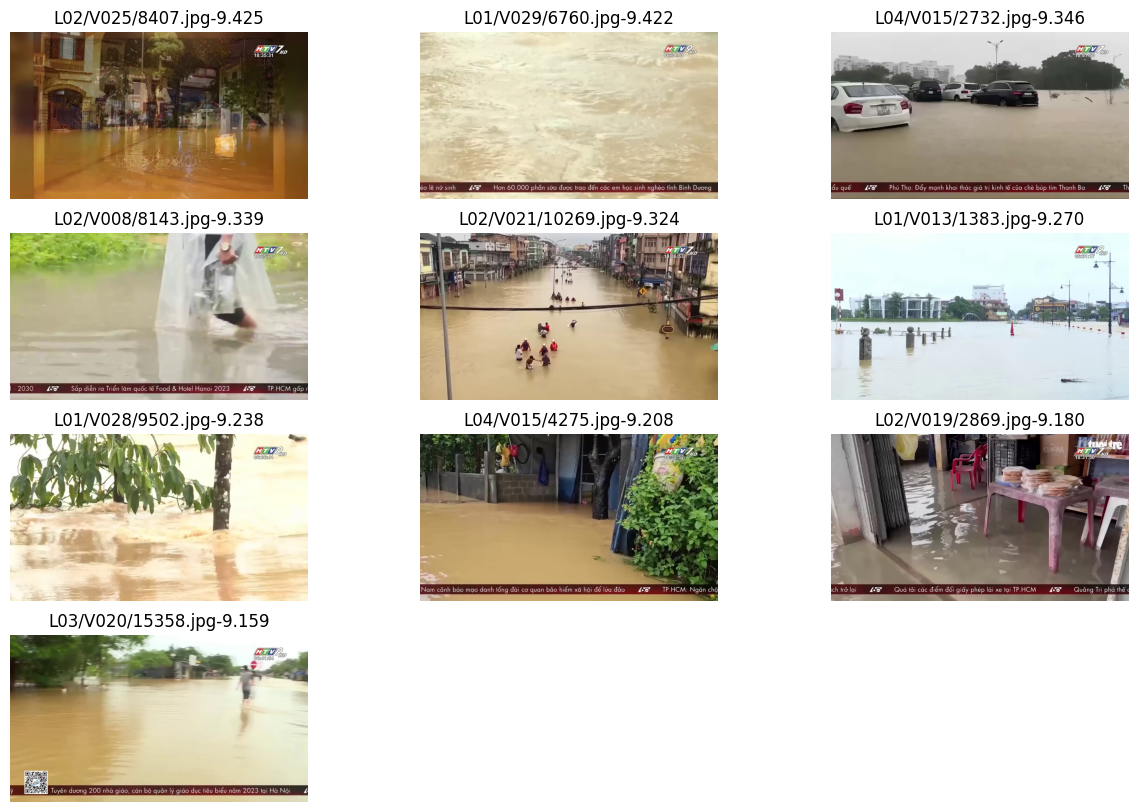

In [5]:
top_k = 10
query_text_1 = 'lũ lụt'
query_text_2 = 'xe ô tô đi trong lũ lụt'

query_text_1 = translator(query_text_1) if detect(query_text_1) == 'vi' else query_text_1
query_text_2 = translator(query_text_2) if detect(query_text_2) == 'vi' else query_text_2

start_time = time.time()
# Vì search trên global nên image_path_subset = None
result = temporal_search.search(query_text_1, query_text_2, image_path_subset=None, number_frame=50, top_k=top_k)
'''
result sẽ có định dạng là  {image_path: score}
'''
end_time = time.time()

print('Thời gian truy vấn:', end_time - start_time)
display_images(result)